# Lab 3 - Computational Efficiency
- **Author:** Qutub Khan Vajihi ([qutubkhan.vajihi@berkeley.edu](mailto:dimitri@berkeley.edu)) (based on Dimitris Papadimitriou's Lab)
- **Date:** 10 February 2020
- **Course:** INFO 251: Applied Machine Learning

### Quick Announcements:

* PS3 is out! Due on Feb 22 11:59pm
* You'll have to implement most of the functions from scratch. Start early! :) 

### Learning Objectives:
By the end of the lab, you will be able to:

* Understand the trade-offs between 'For' loops and Vectorized computation
* Be able to use vectorization for defining complex funtions
* Understand NumPy broadcasting rules

### References:
* https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
* https://numpy.org/doc/stable/user/basics.broadcasting.html
* https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

## Vectorized Operations using NumPy

### Introduction


* NumPy's ND-arrays are homogenous i.e. **an array can only contain data of a single type**. For instance, an array can contain 8-bit integers or 32-bit floats, not both mixed. This contrasts the traditional Python lists and tuples, which are unrestricted in the variety of contents they possess. 


* This restriction on an array’s contents comes at a great benefit; in “knowing” that an array’s contents are homogeneous in data type, NumPy is able to **delegate the task of performing mathematical operations on the array’s contents to optimized, compiled C code**. This is a process that is referred to as *vectorization*.


* The outcome of this can be a **tremendous speedup** relative to the analogous computation performed in Python, which must painstakingly check the data type of every one of the items as it iterates over the arrays, since Python typically works with lists with unrestricted contents.

### Simple Examples
Let's start off by looking at some simple examples to understand the benefits of vectorization - 

In [167]:
import numpy as np
import time

Let's take the sum from 0-9999 using a For loop - 

In [168]:
t_start = time.time()
total = 0
for i in np.arange(10000):
     total = i + total

t1 = time.time() - t_start
print('The result is {} computed in {} seconds'.format(total, t1))

The result is 49995000 computed in 0.0029914379119873047 seconds


Not too bad, right? Lets try the same operation using NumPy!

In [169]:
t_start = time.time()
total = np.sum(np.arange(10000))
t2 = time.time() - t_start
print('The result is {} computed in {} seconds'.format(total, t2))

The result is 49995000 computed in 0.0010259151458740234 seconds


In [170]:
print("{:.0f} times faster".format(t1 / t2))

3 times faster


**That's almost 3-5 times faster!**
Let's look at some more concrete examples - 

In [171]:
x = np.arange(1e6)
y = np.arange(1e6)

In [172]:
def sum_product(x, y):
    """Return the sum of x[i] * y[i] for all indices."""
    
    # using for loop here
    s = 0
    for i in range(len(x)):
        s += x[i] * y[i]
    return s

t_start = time.time()
r = sum_product(x, y)
t_end = time.time()
t1 = t_end - t_start
print('The result is {} computed in {} seconds'.format(r, t1))

The result is 3.3333283333312755e+17 computed in 0.4363365173339844 seconds


In [173]:
t_start = time.time()
r = np.sum(x * y)
t_end = time.time()
t2 = t_end - t_start
print('The result is {} computed in {} seconds'.format(r, t2))

The result is 3.333328333335e+17 computed in 0.005983829498291016 seconds


In [174]:
print("{:.0f} times faster".format(t1 / t2))

73 times faster


### A More Complex Example
Let's use some slightly complex functions now - 

We want to maximize a function $f$ of two variables $(x,y)$:  $f(x, y) = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2}$

To maximize it, we’re going to use a naive grid search:
1. Evaluate $f$ for all $(x,y)$ in a grid on the square
2. Return the maximum of observed values

Before we start, let's just understand what a **meshgrid** is. This can be very useful sometimes. 

The purpose of meshgrid is to *create a rectangular grid out of an array of x values and an array of y values*.

So, for example, say we want to create a grid where we have a point at each integer value between 0 and 4 in both the x and y directions. To create a rectangular grid, we need every combination of the x and y points.

In [175]:
"""
x[0,0] = 0    y[0,0] = 0
x[0,1] = 1    y[0,1] = 0
x[0,2] = 2    y[0,2] = 0
x[0,3] = 3    y[0,3] = 0
x[0,4] = 4    y[0,4] = 0
x[1,0] = 0    y[1,0] = 1
x[1,1] = 1    y[1,1] = 1
...
x[4,3] = 3    y[4,3] = 4
x[4,4] = 4    y[4,4] = 4


x =   0 1 2 3 4        y =   0 0 0 0 0
      0 1 2 3 4              1 1 1 1 1
      0 1 2 3 4              2 2 2 2 2
      0 1 2 3 4              3 3 3 3 3
      0 1 2 3 4              4 4 4 4 4
"""

'\nx[0,0] = 0    y[0,0] = 0\nx[0,1] = 1    y[0,1] = 0\nx[0,2] = 2    y[0,2] = 0\nx[0,3] = 3    y[0,3] = 0\nx[0,4] = 4    y[0,4] = 0\nx[1,0] = 0    y[1,0] = 1\nx[1,1] = 1    y[1,1] = 1\n...\nx[4,3] = 3    y[4,3] = 4\nx[4,4] = 4    y[4,4] = 4\n\n\nx =   0 1 2 3 4        y =   0 0 0 0 0\n      0 1 2 3 4              1 1 1 1 1\n      0 1 2 3 4              2 2 2 2 2\n      0 1 2 3 4              3 3 3 3 3\n      0 1 2 3 4              4 4 4 4 4\n'

This is cumbersome, and gets worst when the arrays are larger, or if you want arbitrary grids. Here is where meshgrid helps.

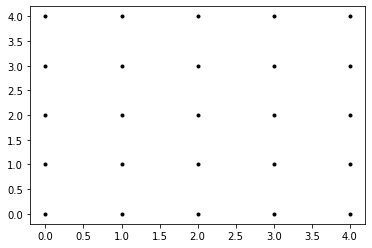

In [176]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);
xx, yy = np.meshgrid(xvalues, yvalues)
plt.plot(xx, yy, marker='.', color='k', linestyle='none');

In [177]:
xvalues

array([0, 1, 2, 3, 4])

In [178]:
xx

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

Now let's get back to our question for maximizing the function.

In [52]:
# Should be importing all these libraries at the start of the notebook, but doing this here for illustration purposes.
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

In [180]:
# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

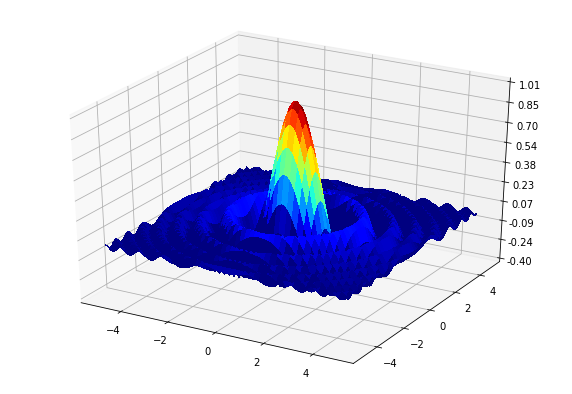

In [181]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet(Z),
                       linewidth=0, antialiased=False, shade=False)

# Customize the z axis.
ax.set_zlim(-0.4, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()

What a pretty rainbow ripple!
Now that you know what the function looks like, let's try and maximize it. First, using for loops - 

In [184]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
m = -np.inf
t_start = time.time()
for x in X:
    for y in Y:
        z = f(x, y)
        if z > m:
            m = z
print('The maximum value observed is:',m)
t_end = time.time()
t1 = t_end - t_start
print("Time: {:.5f}s".format(t1))

The maximum value observed is: 1.0
Time: 0.03727s


Now the same maximization using vectorization - 

In [185]:
x, y = np.meshgrid(X, Y)
t_start = time.time()
Z= f(x, y)
print('The maximum value observed is:',np.max(Z))
t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))

The maximum value observed is: 1.0
Time: 0.00102s


In [186]:
print("{:.0f} times faster".format(t1 / t2))

37 times faster


In [202]:
X = np.arange(-5, 100, 0.1)
Y = np.arange(-5, 100, 0.1)
m = -np.inf
t_start = time.time()
for x in X:
    for y in Y:
        z = f(x, y)
        if z > m:
            m = z
print('The maximum value observed is:',m)
t_end = time.time()
t1 = t_end - t_start
print("Time: {:.5f}s".format(t1))
x, y = np.meshgrid(X, Y)
t_start = time.time()
Z= f(x, y)
print('The maximum value observed is:',np.max(Z))
t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))
print("{:.0f} times faster".format(t1 / t2))

The maximum value observed is: 1.0
Time: 3.41975s
The maximum value observed is: 1.0
Time: 0.04840s
71 times faster


### General Comparison between Numpy Vectorize and other operations

<img src="Comparison.png" width=700 height=700 />

## Broadcasting

* Basic operations on numpy arrays (addition, subtraction etc.) are element-wise. This works on arrays of the same size.


* Nevertheless, it is also possible to do operations on arrays of different sizes if numpy can transform these arrays so that they all have the same size: this conversion is called **broadcasting**.


* The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. 


* There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.


When operating on two arrays, NumPy compares their shapes element-wise. Two dimensions are compatible when the size of the trailing axes for both arrays in an operation are - 
* Equal, or
* One of them is 1


If these conditions are not met, a *ValueError: operands could not be broadcast together* exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

<img src="Br1.png" width=700 height=700 />

<img src="Br2.png" width=700 height=700 />

<img src="Illegal.gif" width=500 height=500 />

Let's try this out in code - 

In [189]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])
print(a)
print(a.shape)

b = np.array([[0, 1, 2],
              [0, 1, 2],
              [0, 1, 2],
              [0, 1, 2]])
print('\n\n\n',b)
print(b.shape)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
(4, 3)



 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
(4, 3)


In [191]:
a + b #Easy!

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [192]:
b1 = np.array([0,1,2])
print(b1)
print(b1.shape)

[0 1 2]
(3,)


In [193]:
a + b1 #b1 will be viewed as shape (1,3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [194]:
a1 = np.array([0,10,20,30]).reshape((4,1)) 
#Should explicitly reshape using the command above or define it differently, like below - 
# a1 = np.array([[0],
#                 [10],
#                 [20],
#                 [30]])
a1.shape

(4, 1)

In [195]:
a1 + b1

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [196]:
c = 3
a + c

array([[ 3,  3,  3],
       [13, 13, 13],
       [23, 23, 23],
       [33, 33, 33]])

In [197]:
type(a + c)

numpy.ndarray

Finally, let's try something illegal!

In [164]:
a2 = np.array([1,2,3,4])
b2 = np.array([1,2,3,4,5])
a2+b2

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

How can we fix that? 

In [198]:
# Just to refresh your memory, Python lists will do something very different when you try similar operations

aa = [1,2,3]
bb = [4,5,6]

In [199]:
aa + bb

[1, 2, 3, 4, 5, 6]

In [200]:
aa - bb

TypeError: unsupported operand type(s) for -: 'list' and 'list'

This is why NumPy arrays are super useful! 

## Other Useful NumPy Mathematical Functions

### Unary Functions
A mathematical function that only accepts one operand (i.e. argument): f(x)

<img src="Unary.png" width=500 height=500 />

### Binary Functions
A mathematical function that only accepts two operands: f(x,y).
There are two cases that we must consider when working with binary functions, in the context of NumPy arrays:

* When both operands of the function are arrays (of the same shape).
* When one operand of the function is a scalar (i.e. a single number) and the other is an array.

<img src="Binary.png" width=700 height=700 />

### Sequential Functions
A sequential function expects a variable-length sequence of numbers as an input, and produces a single number as an output.

<img src="Seq.png" width=700 height=700 />